In [4]:
def insertion_sort(input_list):
    #make an empty list
    
    new_list = [] 
    comparison_count = 0
    
    # as long as there are still things in the list
    while(len(input_list) > 0):
        element = input_list.pop(0)
        
        # put element into new_list in the right place.
        index = 0
        
        comparison_count += 1
        while index < len(new_list) and new_list[index] < element:
            index += 1
            comparison_count += 2
            
        new_list.insert(index, element)    
    return new_list, comparison_count        

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
test_list = [1,2,3,55,5,6,7,8,9]

In [9]:
insertion_sort(test_list)

([1, 2, 3, 5, 6, 7, 8, 9, 55], 71)

In [13]:
list_lengths = []
comp_counts = []

In [16]:
for i in range(100):
    
    list_size = np.random.randint(low=10, high=1000)
    
    test = np.random.randint(low=-1000, high=1000, size=list_size)
    
    test_list = list(test)
    
    sorted_version, count = insertion_sort(test_list)
    
    list_lengths.append(list_size)
    comp_counts.append(count)

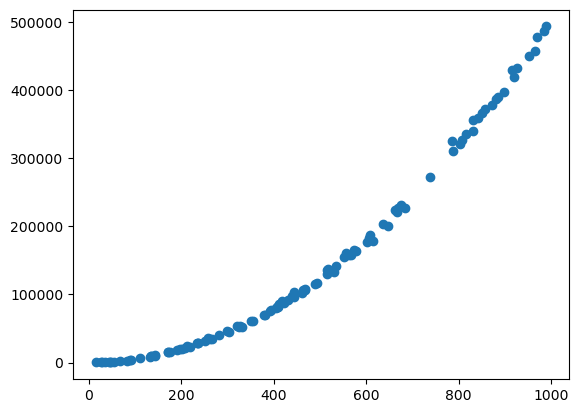

In [17]:
plt.scatter(list_lengths, comp_counts)

In [22]:
def recursive_insertion_sort(input_list):
    
    # we want to sort a list of length n
    
    # by splitting it into two smaller problems:
        # sorting a list of length n-1
        # figuring out where to put the nth thing
        
    # base case: list is empty or only has one thing
    if len(input_list) <= 1:
        return (input_list, 1)
    
    # recursive case:
    else:
        # get the first n-1 things
        smaller_list = input_list[:len(input_list)-1]
        remaining_element = input_list[-1]
        
        # sort the smaller list with recursion!
        sorted_small_list, comparison_count = recursive_insertion_sort(smaller_list)
        
        #sorted small list is now in order.
        index = 0
        
        comparison_count += 1
        while index < len(sorted_small_list) and sorted_small_list[index] < remaining_element:
            index += 1
            comparison_count += 2
        sorted_small_list.insert(index, remaining_element) 
        
        return sorted_small_list, comparison_count

In [23]:
recursive_insertion_sort([3,6,1,78,21,-100,58])

([-100, 1, 3, 6, 21, 58, 78], 31)

In [1]:
def merge_sort(input_list):
    
    # we want to sort a list of length n
    
    # by splitting it into two smaller problems (sorting two lists of length n/2)
        
    # base case: list is empty or only has one thing
    if len(input_list) <= 1:
        return (input_list, 1)
    
    # recursive case:
    else:
        
        n = len(input_list)
        
        # split the list in half
        first_half = input_list[: n // 2]
        second_half = input_list[ n // 2 :]
        
        #get the sorted first and second halves,
        # along with comparison counts
        sorted_first_half, comp_1 = merge_sort(first_half)
        sorted_second_half, comp_2 = merge_sort(second_half)
        
        result_list = []
        comp_count = 0
        
        # as long as both lists have things in them,
        # pop the smallest of the "front" things in each list.
        while len(sorted_first_half) > 0 and len(sorted_second_half) > 0:
            comp_count += 1
            if sorted_first_half[0] < sorted_second_half[0]:
                result_list.append(sorted_first_half.pop(0))
            else:
                result_list.append(sorted_second_half.pop(0))
                
        return result_list + sorted_first_half + sorted_second_half, comp_count + comp_1 + comp_2

In [2]:
merge_sort([3,6,1,78,21,-100,58])

([-100, 1, 3, 6, 21, 58, 78], 19)